In [1]:
versioninfo()

Julia Version 1.10.2
Commit bd47eca2c8a (2024-03-01 10:14 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 32 × Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, haswell)
Threads: 1 default, 0 interactive, 1 GC (on 32 virtual cores)
Environment:
  JULIA_PKG_SERVER = https://mirrors.tuna.tsinghua.edu.cn/julia


# 1 test Matrix

In [2]:
x = rand(100,10)

100×10 Matrix{Float64}:
 0.260481   0.726504   0.834232   …  0.738463   0.564584   0.185042
 0.357193   0.797373   0.83336       0.0337622  0.0781145  0.135365
 0.0461967  0.882991   0.757382      0.969091   0.467381   0.717111
 0.626842   0.175167   0.198684      0.527276   0.79276    0.106456
 0.452804   0.569827   0.418725      0.940176   0.96525    0.869396
 0.123348   0.128375   0.297815   …  0.052539   0.112809   0.208929
 0.164665   0.696488   0.383256      0.992696   0.0467203  0.156584
 0.349346   0.705758   0.892667      0.449994   0.190726   0.0956538
 0.740418   0.731001   0.0293134     0.713973   0.98213    0.898917
 0.544841   0.592396   0.318818      0.494077   0.701852   0.0580079
 0.229622   0.263265   0.54663    …  0.556308   0.792299   0.273186
 0.387784   0.429193   0.463995      0.0890426  0.351812   0.441005
 0.149436   0.844712   0.709616      0.536089   0.124676   0.334199
 ⋮                                ⋱                        
 0.937777   0.471198   0.39825

In [3]:
Base.summarysize(x)

8040

In [4]:
using LinearAlgebra;  #to use I()
m=3
a = Matrix(1I, m, m);
print("a=", a);
A = rand(3,3) + I(3) # Familiar Syntax

a=[1 0 0; 0 1 0; 0 0 1]

3×3 Matrix{Float64}:
 1.76166    0.505718  0.369196
 0.0626461  1.74494   0.314504
 0.522436   0.47693   1.87989

In [5]:
x = A[1,2]
y = (A+2I)[3,3] # The [3,3] entry of A+2I

3.879885764140175

In [6]:
sizeof(a)

72

In [7]:
sizeof(I)

1

In [8]:
sizeof(A)

72

In [9]:
Matrix{Int}(I, 3, 3)      #Identity matrix of Int type

3×3 Matrix{Int64}:
 1  0  0
 0  1  0
 0  0  1

In [10]:
U = UniformScaling(2);
print(U)

UniformScaling{Int64}(2)

In [11]:
strang(n) = SymTridiagonal(2*ones(n),-ones(n-1))
strang(7)

7×7 SymTridiagonal{Float64, Vector{Float64}}:
  2.0  -1.0    ⋅     ⋅     ⋅     ⋅     ⋅ 
 -1.0   2.0  -1.0    ⋅     ⋅     ⋅     ⋅ 
   ⋅   -1.0   2.0  -1.0    ⋅     ⋅     ⋅ 
   ⋅     ⋅   -1.0   2.0  -1.0    ⋅     ⋅ 
   ⋅     ⋅     ⋅   -1.0   2.0  -1.0    ⋅ 
   ⋅     ⋅     ⋅     ⋅   -1.0   2.0  -1.0
   ⋅     ⋅     ⋅     ⋅     ⋅   -1.0   2.0

In [12]:
strang(8)\ones(8)

8-element Vector{Float64}:
  4.0
  7.0
  9.0
 10.000000000000002
 10.000000000000002
  9.0
  7.0
  4.0

# 2 PyPlot

In [13]:
import Pkg;
Pkg.add("PyPlot") # Download the PyPlot package
using PyPlot # load the functionality into Julia
for i=1:5
    y=cumsum(randn(500))
    plot(y)
end

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


LoadError: InitError: could not load library "/usr/lib/x86_64-linux-gnu/libpython3.10.so.1.0"
/usr/lib/x86_64-linux-gnu/libpython3.10.so.1.0: cannot open shared object file: No such file or directory
during initialization of module PyCall

- /usr/lib/x86_64-linux-gnu/libpython3.10.so.1.0 is missing. PyPlot can't work.

# 3 Gadfly

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


 11.098710 seconds (6.05 M allocations: 520.351 MiB, 6.62% gc time)
  0.000197 seconds (133 allocations: 12.797 KiB)


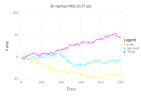

In [18]:
@time Pkg.add("Gadfly") # Download the Gadfly package
@time using Gadfly # load the functionality into Julia
n = 500
l = ["First", "Second", "Third"]
c = [colorant"yellow",colorant"cyan",colorant"magenta"]
p = [layer(x=1:n, y=cumsum(randn(n)), Geom.line, Theme(default_color=i)) for i in c ]
labels=(Guide.xlabel("Time"), Guide.ylabel("Value"),
    Guide.title("Brownian Motion Trials"), 
    Guide.manual_color_key("Legend", l, c))
Gadfly.plot(p..., labels...)

In [42]:
xdump(Number)

LoadError: UndefVarError: xdump not defined

In [43]:
sumsq

LoadError: UndefVarError: sumsq not defined

In [44]:
typeof([1:3])

Array{UnitRange{Int64},1}

# 4 Linear Mixed Models

In [31]:
# describe() is from DataAPI
@time import Pkg; Pkg.add("DataAPI")
@time using DataAPI, DataFrames

  0.001336 seconds (209 allocations: 23.578 KiB)


   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [9a962f9c] + DataAPI v1.16.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


  0.000163 seconds (133 allocations: 12.797 KiB)


In [19]:
@time import Pkg; Pkg.add("MixedModels");
@time using MixedModels

  0.000257 seconds (209 allocations: 23.578 KiB)


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


  0.000193 seconds (133 allocations: 12.805 KiB)


In [25]:
dyestuff_ds = MixedModels.dataset(:dyestuff)

Arrow.Table with 30 rows, 2 columns, and schema:
 :batch  String
 :yield  Int16

In [33]:
describe(DataFrame(dyestuff_ds))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,batch,,A,,F,0,String
2,yield,1527.5,1440,1530.0,1635,0,Int16


  0.060787 seconds (39.74 k allocations: 2.586 MiB, 96.47% compilation time)


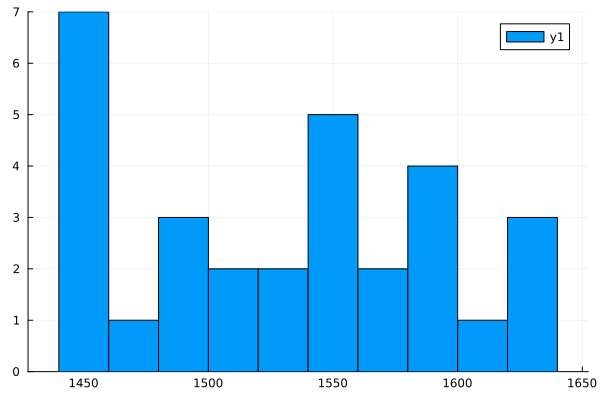

In [39]:
using Plots;
@time histogram(dyestuff_ds.yield, bins=10)

In [11]:
@time m1 = fit(MixedModel, @formula(yield ~ 1 + (1|batch)), dyestuff_ds)

  0.474219 seconds (494.32 k allocations: 26.921 MiB, 96.72% compilation time)


|             |      Est. |      SE |     z |      p | σ_batch |
|:----------- | ---------:| -------:| -----:| ------:| -------:|
| (Intercept) | 1527.5000 | 17.6946 | 86.33 | <1e-99 | 37.2603 |
| Residual    |   49.5101 |         |       |        |         |


In [26]:
@time m1 = fit(MixedModel, @formula(yield ~ 1 + (1|batch)), dyestuff_ds)

  0.001449 seconds (1.09 k allocations: 54.375 KiB)


|             |      Est. |      SE |     z |      p | σ_batch |
|:----------- | ---------:| -------:| -----:| ------:| -------:|
| (Intercept) | 1527.5000 | 17.6946 | 86.33 | <1e-99 | 37.2603 |
| Residual    |   49.5101 |         |       |        |         |


# 5 Bootstrap

In [23]:
@time bs = parametricbootstrap(MersenneTwister(42), 1000, m1);

LoadError: UndefVarError: `MersenneTwister` not defined

In [14]:
@time propertynames(bs)

  0.000011 seconds (1 allocation: 160 bytes)


13-element Vector{Symbol}:
 :allpars
 :objective
 :σ
 :β
 :se
 :coefpvalues
 :θ
 :σs
 :λ
 :inds
 :lowerbd
 :fits
 :fcnames

In [15]:
@time bs.coefpvalues

  1.927370 seconds (2.32 M allocations: 128.499 MiB, 2.53% gc time, 99.79% compilation time)


1000-element Vector{NamedTuple{(:iter, :coefname, :β, :se, :z, :p), Tuple{Int64, Symbol, Float64, Float64, Float64, Float64}}}:
 (iter = 1, coefname = Symbol("(Intercept)"), β = 1516.6652437308005, se = 20.963142804583587, z = 72.34913475851445, p = 0.0)
 (iter = 2, coefname = Symbol("(Intercept)"), β = 1503.6298166213267, se = 7.152752941387974, z = 210.21693730268152, p = 0.0)
 (iter = 3, coefname = Symbol("(Intercept)"), β = 1529.2007879746182, se = 11.730338348605297, z = 130.36288830973368, p = 0.0)
 (iter = 4, coefname = Symbol("(Intercept)"), β = 1529.9709956163806, se = 17.176522185528583, z = 89.07338628220087, p = 0.0)
 (iter = 5, coefname = Symbol("(Intercept)"), β = 1474.9402111337467, se = 21.42725011281228, z = 68.83478763575995, p = 0.0)
 (iter = 6, coefname = Symbol("(Intercept)"), β = 1540.7164167441078, se = 10.904345565462865, z = 141.2937995677605, p = 0.0)
 (iter = 7, coefname = Symbol("(Intercept)"), β = 1509.4032586858852, se = 17.78945302132631, z = 84.848210727

In [16]:
@time bs.coefpvalues

  0.002772 seconds (24.50 k allocations: 851.875 KiB)


1000-element Vector{NamedTuple{(:iter, :coefname, :β, :se, :z, :p), Tuple{Int64, Symbol, Float64, Float64, Float64, Float64}}}:
 (iter = 1, coefname = Symbol("(Intercept)"), β = 1516.6652437308005, se = 20.963142804583587, z = 72.34913475851445, p = 0.0)
 (iter = 2, coefname = Symbol("(Intercept)"), β = 1503.6298166213267, se = 7.152752941387974, z = 210.21693730268152, p = 0.0)
 (iter = 3, coefname = Symbol("(Intercept)"), β = 1529.2007879746182, se = 11.730338348605297, z = 130.36288830973368, p = 0.0)
 (iter = 4, coefname = Symbol("(Intercept)"), β = 1529.9709956163806, se = 17.176522185528583, z = 89.07338628220087, p = 0.0)
 (iter = 5, coefname = Symbol("(Intercept)"), β = 1474.9402111337467, se = 21.42725011281228, z = 68.83478763575995, p = 0.0)
 (iter = 6, coefname = Symbol("(Intercept)"), β = 1540.7164167441078, se = 10.904345565462865, z = 141.2937995677605, p = 0.0)
 (iter = 7, coefname = Symbol("(Intercept)"), β = 1509.4032586858852, se = 17.78945302132631, z = 84.848210727

# 6 DataFrames

In [18]:
import Pkg; Pkg.add("DataFrames");using DataFrames;

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
⌃ [a93c6f00] + DataFrames v1.4.2
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [ ]:
@time DataFrame(bs.coefpvalues)

  1.682439 seconds (1.34 M allocations: 69.921 MiB, 99.76% compilation time: 61% of which was recompilation)


# 7 Negative Binomial vs Poisson

In [1]:
using Distributions;
using Random;
using Statistics;
p_ref = 0.9
ref_depth = 100
d = NegativeBinomial(ref_depth, p_ref) 

NegativeBinomial{Float64}(r=100.0, p=0.9)

In [2]:
println(params(d));
println(succprob(d));
println(failprob(d));
println("Probability of find 10 mutant reads before 10000 ref ones is ", pdf(d, 10))
println("Mean of this NB is ", params(d)[1]*(1-succprob(d))/succprob(d), ". Or by calling mean() ", mean(d))
println("Variance of the NB is ", params(d)[1]*(1-succprob(d))/succprob(d)^2, ". Or by calling var() ", var(d));
println("Median of this NB is ", median(d));
println("Probability of find at most 10 mutant reads before 10000 ref ones is ", cdf(d,10));
println("Probability of find 10 or more mutant reads before 10000 ref ones is ", 1-cdf(d,9));

(100.0, 0.9)
0.9
0.09999999999999998
Probability of find 10 mutant reads before 10000 ref ones is 0.11324243938678996
Mean of this NB is 11.111111111111109. Or by calling mean() 11.111111111111109
Variance of the NB is 12.345679012345675. Or by calling var() 12.345679012345675
Median of this NB is 11
Probability of find at most 10 mutant reads before 10000 ref ones is 0.45355228876956877
Probability of find 10 or more mutant reads before 10000 ref ones is 0.6596901506172212


In [3]:
d_pois = Poisson((ref_depth/p_ref)*(1-p_ref))

Poisson{Float64}(λ=11.111111111111109)

In [4]:
count_v = 1:1:20;
count_p_pois = pdf.(d_pois,count_v)

20-element Vector{Float64}:
 0.0001660593169420164
 0.0009225517607889796
 0.0034168583732925185
 0.009491273259145882
 0.02109171835365751
 0.03905873769195833
 0.061997996336441874
 0.08610832824505782
 0.10630657808031839
 0.11811842008924271
 0.11931153544367948
 0.11047364392933326
 0.09442191788831905
 0.07493803007009445
 0.05550965190377363
 0.03854836937762042
 0.02519501266511158
 0.015552476953772511
 0.009095015762440048
 0.005052786534688918

In [5]:
count_p_nb = pdf.(d,count_v)

20-element Vector{Float64}:
 0.00026561398887587555
 0.0013413506438231689
 0.004560592188998782
 0.011743524886671892
 0.02442653176427748
 0.04274643058748582
 0.06473030917533529
 0.08657678852201071
 0.10389214622641361
 0.11324243938678996
 0.11324243938679077
 0.1047492564327822
 0.09024551323439615
 0.0728410213963337
 0.05535917626121378
 0.039789407937747885
 0.027150419533992783
 0.01764777269709506
 0.010960195675038163
 0.006521316426647618

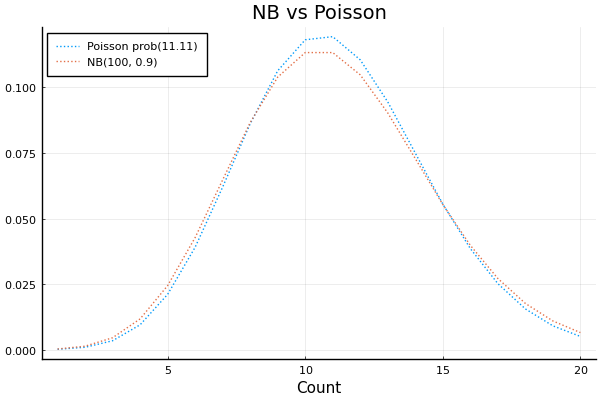

In [6]:
# Pkg.add("Plots")
using Plots, Random;
pyplot()  # set the backend to PyPlot
Plots.plot(count_v, count_p_pois, ls=:dot, title="NB vs Poisson", xlab="Count", label="Poisson prob(11.11)", legend=:topleft)
Plots.plot!(count_v, count_p_nb, ls=:dot, label="NB(100, 0.9)")
#plot!(xscale=:log10, yscale=:log10, minorgrid=true)
#Plots.plot!(xscale=:log10, yscale=:identity, minorgrid=true)

- NB is fatter than Poisson given the same mean.